In [6]:
import torch
import torchvision
from tqdm import tqdm
import tensorboardX
import numpy as np
from torch import nn
from matplotlib import pyplot as plt
import skimage
from PIL import Image
import pandas as pd
import sklearn.model_selection
from timeit import timeit
from time import time
from torch.utils.data import DataLoader, Dataset

In [6]:
!nvidia-smi

Sun Oct  6 09:27:21 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  On   | 00000000:65:00.0 Off |                  N/A |
| 35%   31C    P8    15W / 260W |      0MiB / 10989MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [5]:
# dtype https://pytorch.org/docs/stable/tensor_attributes.html

garbage = torch.empty(3, 5) 
ones = torch.ones(3, 5)
zeros = torch.zeros(3, 5, dtype=torch.uint8)
random = torch.rand(2, 2)

data = torch.tensor([i + 1 for i in range(25)])

data = data.reshape((5, -1))

data.shape

data = data + data
data = data * data

# broadcast
data += 1



data += torch.tensor([i for i in range(5)])
data

stupac = torch.tensor([[i for i in range(5)]]).T

print(data)

data += stupac

data

tensor([[   5,   18,   39,   68,  105],
        [ 145,  198,  259,  328,  405],
        [ 485,  578,  679,  788,  905],
        [1025, 1158, 1299, 1448, 1605],
        [1765, 1938, 2119, 2308, 2505]])


tensor([[   5,   18,   39,   68,  105],
        [ 146,  199,  260,  329,  406],
        [ 487,  580,  681,  790,  907],
        [1028, 1161, 1302, 1451, 1608],
        [1769, 1942, 2123, 2312, 2509]])

In [8]:
huge_tensor = torch.rand(4096, 4096)

huge_tensor = huge_tensor.to("cuda")

#huge_tensor = None

!nvidia-smi

Sun Oct  6 09:27:45 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 410.104      Driver Version: 410.104      CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  On   | 00000000:65:00.0 Off |                  N/A |
| 35%   33C    P2    64W / 260W |   1193MiB / 10989MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

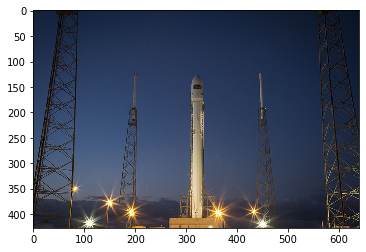

numpy.ndarray

In [9]:
spacex = skimage.data.rocket()

img = plt.imshow(spacex)

plt.show()
type(spacex)

In [10]:
!ls

iris.jpg  run_notebook.sh  titanic  uvod.ipynb


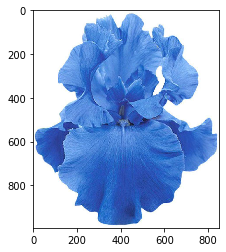

In [11]:
iris = Image.open("iris.jpg")

type(iris)
iris = np.array(iris)

img = plt.imshow(iris)
plt.show()

In [12]:
train = pd.read_csv("titanic/train.csv")

print(train.columns.values)

print(set(train["Sex"]))

print(len(train))

#train

titanic = train[["Pclass", "Sex", "Parch", "Fare", "Age", "Survived"]]

titanic = titanic.dropna()

#print(set(titanic["Sex"]), set(titanic["Pclass"]), set(titanic["Parch"]), set(titanic["Fare"]), set(titanic["Survived"]))


print(len(titanic))
titanic

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
{'female', 'male'}
891
714


,Pclass,Sex,Parch,Fare,Age,Survived
0,3,male,0,7.2500,22.0,0
1,1,female,0,71.2833,38.0,1
2,3,female,0,7.9250,26.0,1
3,1,female,0,53.1000,35.0,1
4,3,male,0,8.0500,35.0,0
...,...,...,...,...,...,...
885,3,female,5,29.1250,39.0,0
886,2,male,0,13.0000,27.0,0
887,1,female,0,30.0000,19.0,1
889,1,male,0,30.0000,26.0,1


In [13]:
tt_numpy = titanic.values

tt_numpy_sex = tt_numpy[:, 1]

tt_numpy_sex

sex_to_cat = {"female" : 1, "male" : 0}

cats = [sex_to_cat[element] for element in tt_numpy_sex]

tt_numpy[:, 1] = cats

features = tt_numpy[:, 0:5]
labels = tt_numpy[:, -1]

features = np.array(features, dtype=np.float32)
labels = np.array(labels, dtype=np.int8)

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(features, labels, train_size=0.7)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((499, 5), (215, 5), (499,), (215,))

In [14]:
# neural net

import torch.nn as nn
import torch.nn.functional as F

class FCANN(nn.Module):
    
    def __init__(self):
        super(FCANN, self).__init__()
        
        self.fc1 = nn.Linear(5, 100)
        self.fc2 = nn.Linear(100, 20)
        self.fc3 = nn.Linear(20, 2)
    
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        
        out = self.fc2(out)
        out = F.relu(out)
        
        out = self.fc3(out)
        return out

In [15]:
model = FCANN()

model.eval()

FCANN(
  (fc1): Linear(in_features=5, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=2, bias=True)
)

In [16]:
device = "cpu"

with torch.no_grad():
    input_data = torch.tensor(X_train)
    
    input_data = input_data.to(device)
    model = model.to(device)
    
    print(timeit(lambda :model(input_data), number=10000))

1.3403475796803832


In [3]:
def get_n_params(model, verbose=False):
    pp=0
    for i, p in enumerate(list(model.parameters())):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        if verbose:
            print("{}".format(nn))
        pp += nn
    return pp

In [18]:
get_n_params(model, True)

500
100
2000
20
40
2


2662

epoch   0. : loss avg: 0.3774, time: 0.36 sec
epoch   1. : loss avg: 0.3472, time: 0.35 sec
epoch   2. : loss avg: 0.3458, time: 0.35 sec
epoch   3. : loss avg: 0.3450, time: 0.35 sec
epoch   4. : loss avg: 0.3442, time: 0.35 sec
epoch   5. : loss avg: 0.3436, time: 0.36 sec
epoch   6. : loss avg: 0.3431, time: 0.35 sec
epoch   7. : loss avg: 0.3425, time: 0.36 sec
epoch   8. : loss avg: 0.3421, time: 0.36 sec
epoch   9. : loss avg: 0.3416, time: 0.31 sec
epoch  10. : loss avg: 0.3412, time: 0.31 sec
epoch  11. : loss avg: 0.3407, time: 0.31 sec
epoch  12. : loss avg: 0.3403, time: 0.32 sec
epoch  13. : loss avg: 0.3398, time: 0.35 sec
epoch  14. : loss avg: 0.3395, time: 0.36 sec
epoch  15. : loss avg: 0.3391, time: 0.35 sec
epoch  16. : loss avg: 0.3388, time: 0.35 sec
epoch  17. : loss avg: 0.3385, time: 0.36 sec
epoch  18. : loss avg: 0.3382, time: 0.35 sec
epoch  19. : loss avg: 0.3378, time: 0.36 sec
epoch  20. : loss avg: 0.3375, time: 0.36 sec
epoch  21. : loss avg: 0.3371, tim

epoch 179. : loss avg: 0.2993, time: 0.35 sec
epoch 180. : loss avg: 0.2990, time: 0.36 sec
epoch 181. : loss avg: 0.2987, time: 0.36 sec
epoch 182. : loss avg: 0.2986, time: 0.35 sec
epoch 183. : loss avg: 0.2985, time: 0.36 sec
epoch 184. : loss avg: 0.2981, time: 0.35 sec
epoch 185. : loss avg: 0.2980, time: 0.35 sec
epoch 186. : loss avg: 0.2976, time: 0.35 sec
epoch 187. : loss avg: 0.2974, time: 0.35 sec
epoch 188. : loss avg: 0.2972, time: 0.34 sec
epoch 189. : loss avg: 0.2970, time: 0.35 sec
epoch 190. : loss avg: 0.2967, time: 0.36 sec
epoch 191. : loss avg: 0.2966, time: 0.35 sec
epoch 192. : loss avg: 0.2964, time: 0.34 sec
epoch 193. : loss avg: 0.2961, time: 0.35 sec
epoch 194. : loss avg: 0.2960, time: 0.36 sec
epoch 195. : loss avg: 0.2957, time: 0.36 sec
epoch 196. : loss avg: 0.2955, time: 0.35 sec
epoch 197. : loss avg: 0.2954, time: 0.34 sec
epoch 198. : loss avg: 0.2951, time: 0.32 sec
epoch 199. : loss avg: 0.2949, time: 0.35 sec
epoch 200. : loss avg: 0.2947, tim

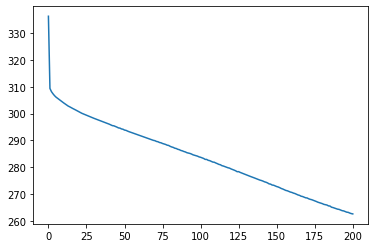

In [88]:
device = "cpu"

model = FCANN()

loss_function = torch.nn.CrossEntropyLoss(reduction="mean")

optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)


model = model.to(device)
model.train()

start = time()

interval = 1

loss_list = []
times = []

# random restarts

for epoch in range(201):
    
    loss_sum = 0
    
    for i in range(len(y_train)):
        sample = X_train[i, :]
        sample = torch.tensor([sample], dtype=torch.float)
        sample = sample.to(device)
        
        label = y_train[i]
        
        label = torch.tensor(np.array([label]), dtype=torch.long)
        label = label.to(device)
        
        optimizer.zero_grad()
        out = model(sample)
        
        loss = loss_function(out, label)
        loss_sum += loss.to("cpu").detach().numpy()
        
        loss.backward()
        
        optimizer.step()
    
    if epoch % interval == 0:
        elapsed = time() - start
        print("epoch {:3d}. : loss avg: {:.4f}, time: {:.2f} sec".format(epoch, loss_sum / len(train), elapsed))
        loss_list.append(loss_sum)
        times.append(elapsed)
        start = time()

print("end")    

plt.plot(loss_list)
#plt.plot(times)

plt.show()

In [89]:
# random

random_model = FCANN()

random_model.eval()

with torch.no_grad():
    
    y_pred = np.argmax(random_model(input_data).numpy(), axis=1)
    #print(y_predicted)
    #print(y_train)
    
    print(sklearn.metrics.accuracy_score(y_train, y_pred))
    

0.4028056112224449


In [90]:
# train

model = model.to("cpu")

model.eval()

with torch.no_grad():
    
    y_pred = np.argmax(model(input_data).numpy(), axis=1)
    #print(y_predicted)
    #print(y_train)
    
    print(sklearn.metrics.accuracy_score(y_train, y_pred))

0.7655310621242485


In [91]:
# test

model.eval()
model = model.to("cpu")

with torch.no_grad():
    
    test_data = torch.tensor(X_test, dtype=torch.float)
    
    y_pred = np.argmax(model(test_data).numpy(), axis=1)
    #print(y_predicted)
    #print(y_train)
    
    print(sklearn.metrics.accuracy_score(y_test, y_pred))

0.7581395348837209


In [92]:
# dataset

class TitanicDataset(Dataset):
    
    def __init__(self, features, labels):
        super(TitanicDataset, self).__init__()
        
        self.features = torch.tensor(features, dtype=torch.float)
        self.labels = torch.tensor(labels, dtype=torch.long)
        
    def __len__(self):
        return len(self.labels)
        
    def __getitem__(self, index):
        
        sample = self.features[index, :]
        label = self.labels[index]
        
        return sample, label

In [93]:
model = FCANN()

loss_function = torch.nn.CrossEntropyLoss(reduction="mean")

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

device = "cuda"
model = model.to(device)
model.train()

FCANN(
  (fc1): Linear(in_features=5, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=2, bias=True)
)

In [ ]:
device = "cpu"
model = model.to(device)

data = TitanicDataset(X_train, y_train)
dataloader = DataLoader(data, batch_size=10, shuffle=True, num_workers=10, drop_last=True)

start = time()
interval = 1
loss_list = []
times = []

for epoch in range(100):
    
    loss_sum = 0
    
    for sample, label in dataloader:
        
        sample = sample.to(device)
        label = label.to(device)
        
        #print(label)
        
        optimizer.zero_grad()
        out = model(sample)
        
        #print(out)
        
        loss = loss_function(out, label)
        loss_sum += loss.to("cpu").detach().numpy()
        
        loss.backward()
        optimizer.step()
    
    if epoch % interval == 0:
        elapsed = time() - start
        print("epoch {:3d}. : loss avg: {:.4f}, time: {:.2f} sec".format(epoch, loss_sum / len(dataloader), elapsed))
        loss_list.append(loss_sum)
        times.append(elapsed)
        start = time()

print("end")    

plt.plot(loss_list)
#plt.plot(times)

plt.show()

In [10]:
# mnist fcann

class FCNN1(nn.Module):
    
    def __init__(self):
        super(FCNN1, self).__init__()

        self.fc1 = nn.Linear(784, 10)

    def forward(self, x):
        out = self.fc1(x)
        return out
    
class FCNN2(nn.Module):
    
    def __init__(self):
        super(FCNN2, self).__init__()

        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 10)
        

    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        return out
    
class FCNN3(nn.Module):
    
    def __init__(self):
        super(FCNN3, self).__init__()

        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)

    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.relu(out)
        out = self.fc3(out)
        return out
    
class FCNN4(nn.Module):
    
    def __init__(self):
        super(FCNN4, self).__init__()

        self.fc1 = nn.Linear(784, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 100)
        self.fc4 = nn.Linear(100, 10)

    def forward(self, x):
        
        out = x.view(-1, 28*28)
        out = self.fc1(out)
        out = F.relu(out)
        out = self.fc2(out)
        out = F.relu(out)
        out = self.fc3(out)
        out = F.relu(out)
        out = self.fc4(out)
        return out
    
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


In [11]:
print(get_n_params(FCNN1(), False))
print(get_n_params(FCNN2(), False))
print(get_n_params(FCNN3(), False))
print(get_n_params(FCNN4(), False))
print(get_n_params(CNN(), False))

7850
79510
89610
99710
431080


In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

    
def train(model, device, train_loader, optimizer, epoch, loss_fun, log_interval=250):
    model.train()
    for i, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fun(output, target)
        loss.backward()
        optimizer.step()
        
        if i % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(data), len(train_loader.dataset),
                100. * i / len(train_loader), loss.item()))

device = "cuda"

transforms = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])

mnist = datasets.MNIST('data', train=True, download=True,
                   transform=transforms)

train_loader = torch.utils.data.DataLoader(mnist, batch_size=64, shuffle=True, num_workers=1)

model = CNN().to(device)

loss_fun = torch.nn.CrossEntropyLoss(reduction="mean")

optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1, 3 + 1):
    train(model, device, train_loader, optimizer, epoch, loss_fun)

print("done")
#torch.save(model.state_dict(),"mnist_cnn.pt")
        

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.325959
Train Epoch: 1 [16000/60000 (27%)]	Loss: 0.405214
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.216554
Train Epoch: 1 [48000/60000 (80%)]	Loss: 0.168267
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.221601
Train Epoch: 2 [16000/60000 (27%)]	Loss: 0.085910
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.158180
Train Epoch: 2 [48000/60000 (80%)]	Loss: 0.066891
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.017452
Train Epoch: 3 [16000/60000 (27%)]	Loss: 0.058471
Train Epoch: 3 [32000/60000 (53%)]	Loss: 0.055584
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.092206
done


In [17]:
def test(model, device, test_loader, loss_fun):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fun(output, target).item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [20]:
mnist_test = datasets.MNIST('data', train=False, download=True,
                   transform=transforms)

test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=64, shuffle=True, num_workers=1)

loss_fun = torch.nn.CrossEntropyLoss(reduction="sum")

test(model, device, test_loader, loss_fun)

print("done")


Test set: Average loss: 0.0821, Accuracy: 9736/10000 (97%)

done
